In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit.Chem import MCS
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd
import seaborn as sns


#descriptor
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcNumHBD
from rdkit.Chem.rdMolDescriptors import CalcNumHBA
from rdkit.Chem.rdMolDescriptors import CalcTPSA

import matplotlib.pyplot as plt

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  after removing the cwd from sys.path.

Bad key savefig.frameon in file C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo i

In [2]:
error

NameError: name 'error' is not defined

In [3]:
data= pd.read_csv('newmols_CVAE_500000_tinib_139.txt')

In [21]:
#data=pd.read_csv('tinib_139.txt')

In [22]:
smiles_list=data['smiles']

In [23]:
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

In [24]:
result=[]
for i in  range(len(mol_list)) :
    try:
        Chem.QED.properties(mol_list[i])
        result.append(True)
    except:
        result.append(False)

In [25]:
data['result']=result

In [26]:
data1=data[result]

In [27]:
data2=data1.reset_index(drop=True)

In [28]:
smiles_list2=data2['smiles']

In [29]:
#smiles_list2.to_excel("afterscreening_CVAE_500000_tinib_139_20201021.xlsx")

In [30]:
mol_list2=[]
for smiles in smiles_list2:
    mol=Chem.MolFromSmiles(smiles)
    mol_list2.append(mol)

In [31]:
finger_list=[]
bi_list=[]
for structrue in mol_list2:
    bi={}
    fp=AllChem.GetMorganFingerprintAsBitVect(structrue,2,nBits=1024,bitInfo=bi)
    fp_arr=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,fp_arr)
    np.nonzero(fp_arr)
    finger_list.append(list(fp.GetOnBits()))
    bi_list.append(bi)

In [32]:
len(finger_list)

139

In [33]:
zeros=np.zeros((len(finger_list),1024))

In [34]:
len(zeros[1])

1024

In [35]:
#fingerprint binary vector
for i in range (len(finger_list)):
    for j in finger_list[i]:
        zeros[i][j]=1

In [36]:
finger_vect=zeros

In [37]:
#fingervect_newmols=finger_vect

In [38]:
finger_vect.shape

(139, 1024)

In [39]:
fingervect_newmols.shape

(4907, 1024)

In [41]:
#newvect=np.concatenate((fingervect_newmols,finger_vect))

In [42]:
newvect.shape

(5046, 1024)

In [43]:
makes errror

SyntaxError: invalid syntax (<ipython-input-43-137cb190d465>, line 1)

In [44]:

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=2, random_state=42)
#X_reduced_tsne = tsne.fit_transform(X)

In [45]:
tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(newvect)

In [46]:
tsne_result.shape

(5046, 2)

In [47]:
transpose=tsne_result.T

In [48]:
transpose.shape

(2, 5046)

In [49]:
type(transpose)

numpy.ndarray

In [50]:
newx=transpose[0][:4907]
newy=transpose[1][:4907]
nibx=transpose[0][4907:]
niby=transpose[1][4907:]

In [51]:
#nib 개수 바뀌면 바뀌어야함
threex=[]
threey=[]
threex.append(nibx[6])
threex.append(nibx[30])
threex.append(nibx[138])
threey.append(niby[6])
threey.append(niby[30])
threey.append(niby[138])

<function matplotlib.pyplot.show(close=None, block=None)>

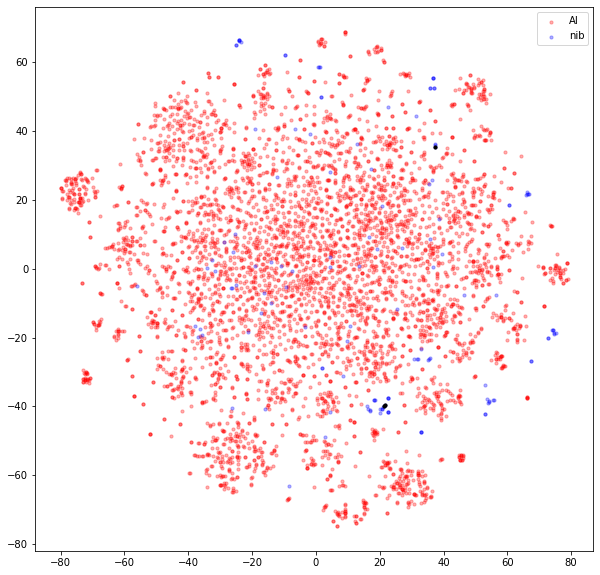

In [55]:
plt.scatter(newx,newy,c='r',s=10,alpha=0.3)
plt.scatter(nibx,niby,c='b',s=10,alpha=0.3)
plt.scatter(threex,threey,c='k',s=10)
plt.rcParams["figure.figsize"] = (10, 10)
plt.legend(['AI','nib'])
plt.show

In [53]:
import math

nearest=[]
dist=[]


#가장 가까운 점 찾기
for i in range(len(nibx)):
    temp=1000
    number=0
    for j in range(len(newx)):
        result=math.sqrt(math.pow(nibx[i]-newx[j], 2) + math.pow(niby[i]-newy[j], 2) )
        if result<temp:
            temp=result
            number=j
    nearest.append(number)
    dist.append(temp)

In [54]:
dist_data=pd.DataFrame({'nearest':nearest,'dist':dist})

In [ ]:
#dist_data.to_excel("dist_result_CVAE_500000_tinib_139_20201021.xlsx")

In [ ]:
data11=pd.DataFrame({'newx':newx,'newy':newy})

In [ ]:
data11.to_excel("CVAE_500000_tinib_139_20201021.xlsx")

In [ ]:
len(niby)

In [68]:
nibx[30]

21.437197

In [69]:
niby[30]

-39.77201

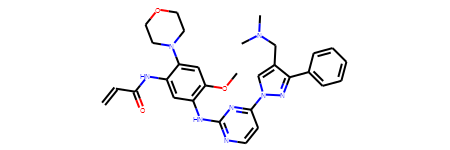

In [73]:
mol_list[138]